# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [105]:
#Importing the OS library in Python to check the current directory path and list of the files avaiable
import os

os.getcwd()
os.listdir()

['.ipynb',
 '.ipynb_checkpoints',
 'act_report.docx',
 'act_report.ipynb',
 'image-predictions.tsv',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Udacity Data Engineer Nanodegree_Twitter We Rate Dogs Dataset Act Report _ by Aseem Narula_Medium_Blog.pdf',
 'wrange_act.pdf',
 'wrange_act_09_June_2023.ipynb',
 'wrange_report_pdf.pdf',
 'wrangle_act.ipynb',
 'wrangle_act_final_for_submission.ipynb',
 'wrangle_report.docx',
 'wrangle_report.ipynb']

In [106]:
#Importing the Python Libraries before starting the Data Gahering
import pandas as pd
import requests as rq
import numpy as np

In [107]:
#Loading the Twitter Archive Enhanced Dataset CSV file into the Dataframe
df_twitter_archive_enhanced_dataset = pd.read_csv('twitter-archive-enhanced.csv')

In [108]:
#Previewing the Top 5 Records using the Head function for Twitter Archive Enhanced Dataset
df_twitter_archive_enhanced_dataset.head(3).T

,0,1,2
tweet_id,892420643555336193,892177421306343426,891815181378084864
in_reply_to_status_id,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [109]:
#Dowloading the 'Tweet Image Predictions' tsv file from the Udacity cloud link using Requests library

#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url = 'image-predictions.tsv'
#response = rq.get(url)
#print(response.status_code)

In [110]:
# Creating dataframe from the 'Tweet Image Predictions' tsv file

df_twitter_image_predictions_tsv = pd.read_csv(url, sep = '\t')
df_twitter_image_predictions_tsv.head(2).T

,0,1
tweet_id,666020888022790149,666029285002620928
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
img_num,1,1
p1,Welsh_springer_spaniel,redbone
p1_conf,0.465074,0.506826
p1_dog,True,True
p2,collie,miniature_pinscher
p2_conf,0.156665,0.0741917
p2_dog,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [111]:
#Getting the Tweet Ids from the Twitter Archive Dataset 
tweet_ids = df_twitter_archive_enhanced_dataset.tweet_id.values
print(tweet_ids)

[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]


In [112]:
#Checking the count of the tweet ids
len(tweet_ids)

2356

In [113]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [114]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'xyz'
consumer_secret = 'xyz'
access_token = 'xyz'
access_secret = 'xyz'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
                 
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive_enhanced_dataset.tweet_id.values
len(tweet_ids)

#print(df_twitter_archive_enhanced_dataset.tweet_id.values)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json1.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')           
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\n\nconsumer_key = \'xyz\'\nconsumer_secret = \'xyz\'\naccess_token = \'xyz\'\naccess_secret = \'xyz\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n                 \n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids 

In [115]:
### Explain how the above code failed while Twitter API settings authentication failed and ticket with Knowledge support team 
### has been raised, mentor has advised me to use the 'tweet-json.txt' dataset and continue the module
### Ticket Reference - https://knowledge.udacity.com/questions/986996

In [116]:
#Opening and Reading the Tweet Json File
import json

df_tweet_json_file = pd.read_json('tweet-json.txt', lines = True, encoding = 'utf-8')
df_tweet_json_file.head(2).T

len(df_tweet_json_file)

2354

In [117]:
# Checking the top 2 records of the Tweet JSON Text File data set
df_tweet_json_file.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [118]:
# Checking the top 2 records of the Tweet JSON Text File data set after tranposing the dataset to get the more clear columns understanding
df_tweet_json_file.head(2).T

,0,1
created_at,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00
id,892420643555336193,892177421306343426
id_str,892420643555336192,892177421306343424
full_text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
truncated,False,False
display_text_range,"[0, 85]","[0, 138]"
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,"{'media': [{'id': 892420639486877696, 'id_str'...","{'media': [{'id': 892177413194625024, 'id_str'..."
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
in_reply_to_status_id,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [119]:
#Analyzing the 'Twitter Archive Enhanced' dataset 
df_twitter_archive_enhanced_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [120]:
# Rows and Columns of the Twitter Archive Enhanced dataset
df_twitter_archive_enhanced_dataset.shape

(2356, 17)

In [121]:
df_twitter_archive_enhanced_dataset.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [122]:
df_twitter_archive_enhanced_dataset.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [123]:
#Checking for rating denominator column in the twitter enhanced dataset

df_twitter_archive_enhanced_dataset.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [124]:
#Checking for rating numerator column in the twitter enhanced dataset

df_twitter_archive_enhanced_dataset.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [125]:
#Checking for rating denominator column with Zero value in the twitter enhanced dataset


df_twitter_archive_enhanced_dataset.loc[df_twitter_archive_enhanced_dataset['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [126]:
#Checking for the duplicate tweet ids
sum(df_twitter_archive_enhanced_dataset.tweet_id.duplicated())

0

In [127]:
# Checking the invalid names and their values in the dataset

df_twitter_archive_enhanced_dataset.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Jim           1
Sparky        1
Lilli         1
Freddery      1
Spanky        1
Name: name, Length: 957, dtype: int64

In [128]:
#Narrowing downing the above query to pinpoint the values of the name column

df_small_letter_names=df_twitter_archive_enhanced_dataset.name.str.contains('^[a-z]', regex = True)
sum(df_twitter_archive_enhanced_dataset[df_small_letter_names].name.value_counts().sort_index())


109

In [129]:
#Number of the tweets with missing expanded URLs

sum(df_twitter_archive_enhanced_dataset.expanded_urls.isna())

59

In [130]:
#Number of the tweets with expanded URLs

sum(df_twitter_archive_enhanced_dataset['expanded_urls'].notnull())

2297

In [131]:
# Original ratings (no retweets) that have images

df_twitter_archive_enhanced_dataset_filtered = df_twitter_archive_enhanced_dataset[ (df_twitter_archive_enhanced_dataset['expanded_urls'].notnull()) & (df_twitter_archive_enhanced_dataset['retweeted_status_id'].isnull()) ]
df_twitter_archive_enhanced_dataset_filtered.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [132]:
# Checking the Source column in the Twitter Enhanced Dataset
df_twitter_archive_enhanced_dataset['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [133]:
# Checking the Twitter Image Predictions Dataset from TSV File
df_twitter_image_predictions_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
# Checking the Twitter Image Predictions Dataset from TSV File - Rows and Columns Size
df_twitter_image_predictions_tsv.shape

(2075, 12)

In [135]:
# Checking the Twitter Image Predictions Dataset from TSV File - Rows and Columns Size
df_twitter_image_predictions_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [136]:
# Checking the Twitter Image Predictions Dataset from TSV File - Head Function for 5 Rows
df_twitter_image_predictions_tsv.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [137]:
# Checking the Twitter Image Predictions Dataset from TSV File - Head Function for 5 Rows - Transpose for better visibility
df_twitter_image_predictions_tsv.head(3).T

,0,1,2
tweet_id,666020888022790149,666029285002620928,666033412701032449
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd
p1_conf,0.465074,0.506826,0.596461
p1_dog,True,True,True
p2,collie,miniature_pinscher,malinois
p2_conf,0.156665,0.0741917,0.138584
p2_dog,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound


In [138]:
df_twitter_image_predictions_tsv['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bison                   1
bearskin                1
tick                    1
conch                   1
pole                    1
Name: p1, Length: 378, dtype: int64

In [139]:
# Checking the value count for P1_dog column
df_twitter_image_predictions_tsv['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [140]:
# Checking the value count for p2_dog column
df_twitter_image_predictions_tsv['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [141]:
# Checking the value count for p3_dog column
df_twitter_image_predictions_tsv['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [142]:
# Checking the Twitter Image Predictions Dataset from TSV File - P1 Column - Unique value
df_twitter_image_predictions_tsv['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [143]:
# Checking the Twitter Image Predictions Dataset from TSV File - P1 Column 
sum(df_twitter_image_predictions_tsv['p1'].duplicated())

1697

In [144]:
#Random checking on the tweet id in the twitter image predictions tsv dataframe
df_twitter_image_predictions_tsv.loc[df_twitter_image_predictions_tsv['tweet_id'] == 666020888022790149]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [145]:
#Creating the new dataset to capture and test, check and verify for the duplicate rows
df_twitter_image_predictions_tsv_duplicateRows = df_twitter_image_predictions_tsv[df_twitter_image_predictions_tsv.duplicated()]

In [146]:
# Printing the duplicate rows dataframe 
df_twitter_image_predictions_tsv_duplicateRows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### This confirms that there no duplicate rows in the Twitter Image Predictions dataset

In [147]:
#Analyzing the JSON Text File 

df_tweet_json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [148]:
# Checking the count of the rows and columns of the JSON Tweet File
df_tweet_json_file.shape

(2354, 31)

In [149]:
# Checking the stats of the JSON tweet file with the describle function
df_tweet_json_file.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


# Quality issues
 
### Twitter Archive Enhanced Dataset

1. Timestamp field is string object.

2. The data columns - tweet_id,in_reply_to_status_id,in_reply_to_user_id etc. should be an object data type but currently they of data types - integer and float in the original dataset.

3. There are only 181 retweets - columns - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.We need only original "tweets" not "retweets".

4. There are "in_reply_to_status_id" and "in_reply_to_user_id" columns which are extra as we need only "original tweets" column in our dataset. 
 

5. There are 109 inconsistent names with small letters with no valid names,also there are NaN values in the dataset in the "name" column should be rename to 'None'.

6. There is one record with rating denominator with the value Zero.

7. There are rating denominator values greater than 10, should be removed.

8. There are only 4 types of values in the source column which can be simplified further to remove complexity.
    Twitter for iPhone,
    Vine - Make a Scene,
    Twitter Web Client,
    TweetDeck
    
9. There are 59 number of tweets which are having missing expanded URL's

### Twitter Image Prediction Dataset

1. There are 324 rows in the Twitter Image Prediction Dataset dataframe which didn't predict anything for three of dog type, best way to predict the dog breed is to combine it with master dataset.

### Tidiness issues
1. The 4 Columns doggo, floofer, pupper, and puppo - should be merged into the one column as this doesn't comply "tidy data" rule.

2. Json Tweet text file dataset should be union with 'Twitter Enhanced Archive' Dataset to get the full view.

3. The data columns in the Json Tweet text file dataset should be reduced to the "tweet_id", "recount_tweet", "favourite_count", extra columns must be removed.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [150]:
# Make copies of original pieces of data

# Making copy of the twitter archive enhanced dataset
df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset.copy()

# Making copy of the twitter image predictions dataset
df_twitter_image_predictions_tsv_copy = df_twitter_image_predictions_tsv.copy()

# Making copy of the tweet json text file dataset
df_tweet_json_file_copy = df_tweet_json_file.copy()


In [151]:
#Checking if copy of the twitter archive enhanced dataset is created using head function

df_twitter_archive_enhanced_dataset_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [152]:
#Checking if copy of the twitter image predictions dataset is created using head function

df_twitter_image_predictions_tsv_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [153]:
#Checking if copy of the tweet json text file dataset is created using head function

df_tweet_json_file_copy.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Issue #1:

#### Define: 

Timestamp field is string object.

#### Code


In [154]:
#Changing the timestamp field in the twitter enhanced dataset
df_twitter_archive_enhanced_dataset_copy['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_dataset_copy['timestamp'], errors='coerce')

#### Test

In [155]:
#Checking the datatype of the timestamp in the dataframe
df_twitter_archive_enhanced_dataset_copy[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2356 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Issue #2:

#### Define

The data columns - tweet_id,in_reply_to_status_id,in_reply_to_user_id etc. should be an object data type but currently they of data types - integer and float in the original dataset.

#### Code

In [156]:
# Chanding the datatype to the "object" datatype for "tweet_id","in_reply_to_status_id","in_reply_to_user_id"
df_twitter_archive_enhanced_dataset_copy["tweet_id"] = df_twitter_archive_enhanced_dataset_copy["tweet_id"].astype("object", errors='ignore')
df_twitter_archive_enhanced_dataset_copy["in_reply_to_status_id"] = df_twitter_archive_enhanced_dataset_copy["in_reply_to_status_id"].astype("object", errors='ignore')
df_twitter_archive_enhanced_dataset_copy["in_reply_to_user_id"] = df_twitter_archive_enhanced_dataset_copy["in_reply_to_user_id"].astype("object", errors='ignore')

#### Test

In [157]:
df_twitter_archive_enhanced_dataset_copy[["tweet_id","in_reply_to_status_id","in_reply_to_user_id"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


### Issue #3: 

#### Define: 

There are only 181 retweets - columns - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.We need only original "tweets" not "retweets".

So, we check and filter for rows where retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are NAN or NULL in the dataframe which means if a original tweet is listed then retweet_status_id should be "NULL" 

#### Code



In [158]:
#This will filter only which are tweets not "retweets" 

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.retweeted_status_id.isna()]
df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.retweeted_status_user_id.isna()]
df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.retweeted_status_timestamp.isna()]


In [159]:
# Checking total of the rows of the "retweeted status id" after cleaning
sum(df_twitter_archive_enhanced_dataset_copy['retweeted_status_id'].isna())

2175

In [160]:
# Checking total of the rows of the "retweeted_status_user_id" after cleaning
sum(df_twitter_archive_enhanced_dataset_copy['retweeted_status_user_id'].isna())

2175

In [161]:
# Checking total of the rows of the "retweeted_status_timestamp" after cleaning
sum(df_twitter_archive_enhanced_dataset_copy['retweeted_status_timestamp'].isna())

2175

In [162]:
# Dropping the "retweet" columns from the dataset as we are only interested in the "original tweets"

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [163]:
# Extra columns are removed from the 'Twitter Enhnaced Archive' dataset, confirming this by doing the info() 
# function on the dataframe

df_twitter_archive_enhanced_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(11)
memory usage: 254.9+ KB


### Issue #4: 

#### Define: 

There are "in_reply_to_status_id" and "in_reply_to_user_id" columns which are extra as we need only "original tweets" column in our dataset.

#### Code



In [164]:
# Removing "in_reply_to_status_id" and "in_reply_to_user_id" columns 

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [165]:
# Checking the columns to twitter archive enhanced dataset using info() function

df_twitter_archive_enhanced_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 220.9+ KB


### Issue #5: 

#### Define: 

There are 109 inconsistent names with small letters with no valid names,also there are NaN values in the dataset in the "name" column should be rename to 'None'.

#### Code




In [166]:
# Checking values which are invalid names
df_small_letter_names=df_twitter_archive_enhanced_dataset_copy.name.str.contains('^[a-z]', regex = True)

df_twitter_archive_enhanced_dataset_copy[df_small_letter_names].name.value_counts().sort_index()


a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [167]:
# checking value which are having value "None" in the name column
df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy['name']=="None"].head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [168]:
df_twitter_archive_enhanced_dataset_copy.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            4
Name: name, Length: 956, dtype: int64

In [169]:
import pandas as pd
import re

# Define a function to check if a name is valid
def check_valid_name(input_name):
    if pd.isnull(input_name) or input_name == "None" or not re.match("^[A-Za-z]+$", input_name) :
        return False
    return True
# Apply the function to the 'name' column and filter out invalid names
invalid_dog_names = df_twitter_archive_enhanced_dataset_copy[~df_twitter_archive_enhanced_dataset_copy['name'].apply(check_valid_name)]

# Display the invalid names
print(invalid_dog_names['name'].value_counts())

None       680
Oliviér      2
Flávio       2
Devón        1
Ralphé       1
Gòrdón       1
Amélie       1
Frönq        1
Name: name, dtype: int64


In [170]:
# Replacing the invalid names with NaN

df_twitter_archive_enhanced_dataset_copy['name'] = df_twitter_archive_enhanced_dataset_copy['name'].apply(lambda y: np.nan if not check_valid_name(y) else y)

#### Test

In [171]:
# Checking if invalid values are converted to 'NaN'

df_twitter_archive_enhanced_dataset_copy['name'].isna().value_counts()

False    1486
True      689
Name: name, dtype: int64

### Issue #6: 

#### Define: 

There is one record with rating denominator with the value Zero. This must be removed as this will cause the error if further used in the downstream calculation.

#### Code




In [172]:
#Cleaning the row with the rating denomiator with the zero value
df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.rating_denominator != 0]

#### Test

In [173]:
#Testing the code to check and verify that the record is deleted from the original dataframe

df_twitter_archive_enhanced_dataset_copy.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        2
10     2153
7         1
2         1
Name: rating_denominator, dtype: int64

### Issue #7: 

#### Define: 

There are rating denominator values greater than 10, should be removed.Ideally we will keep only rating denominator values which are equal to 10 in our case.

#### Code




In [174]:
# Filtering the rating denominator which are equal to 10

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.rating_denominator == 10]

#### Test

In [175]:
#Checking the dataset if rating denominator contains only value equal to 10

df_twitter_archive_enhanced_dataset_copy.rating_denominator.value_counts().sort_index(ascending = False)

10    2153
Name: rating_denominator, dtype: int64

### Issue #8: 

#### Define: 

There are only 4 types of values in the source column which can be simplified further to remove complexity. Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck

#### Code




In [176]:
# Checking the value counts of the "source" column before cleaning in the twitter enhanced dataset
df_twitter_archive_enhanced_dataset_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2020
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [177]:
df_twitter_archive_enhanced_dataset_copy['source'] = df_twitter_archive_enhanced_dataset_copy['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [178]:
# Checking the value counts of the "source" column after cleaning 
df_twitter_archive_enhanced_dataset_copy['source'].value_counts()

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #9: 

#### Define: 

There are 59 number of tweets which are having missing expanded URL's.

#### Code

In [179]:
# Filtering the out the not-null expanded urls values from the dataset

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy.expanded_urls.notnull()]

#### Test

In [180]:
# Testing the values in the column "expanding urls" to check for any NaN values, 
# following test gives the "False" as a confirmation

df_twitter_archive_enhanced_dataset_copy['expanded_urls'].isna().value_counts()

False    2099
Name: expanded_urls, dtype: int64

### Tidiness issue#1:

#### Define: 

The 4 Columns doggo, floofer, pupper, and puppo - should be merged into the one column as this doesn't comply "tidy data" rule.

In [181]:
df_twitter_archive_enhanced_dataset_copy[["doggo","floofer","pupper","puppo"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 4 columns):
doggo      2099 non-null object
floofer    2099 non-null object
pupper     2099 non-null object
puppo      2099 non-null object
dtypes: object(4)
memory usage: 82.0+ KB


In [182]:
df_twitter_archive_enhanced_dataset_copy[["doggo","floofer","pupper","puppo"]].tail(2)

,doggo,floofer,pupper,puppo
2354,None,None,None,None
2355,None,None,None,None


In [183]:
# Checking the unique values of various dog breed stage types

print("-----------------------------------------------------")
print("doggo check of unique values --->", df_twitter_archive_enhanced_dataset_copy["doggo"].unique())
print("-----------------------------------------------------")
print("floofer check of unique values --->", df_twitter_archive_enhanced_dataset_copy["floofer"].unique())
print("-----------------------------------------------------")
print("pupper check of unique values --->", df_twitter_archive_enhanced_dataset_copy["pupper"].unique())
print("-----------------------------------------------------")
print("puppo check of unique values --->", df_twitter_archive_enhanced_dataset_copy["puppo"].unique())
print("-----------------------------------------------------")

-----------------------------------------------------
doggo check of unique values ---> ['None' 'doggo']
-----------------------------------------------------
floofer check of unique values ---> ['None' 'floofer']
-----------------------------------------------------
pupper check of unique values ---> ['None' 'pupper']
-----------------------------------------------------
puppo check of unique values ---> ['None' 'puppo']
-----------------------------------------------------


In [184]:
# Checking the null value counts of various dog breed stage types

print("-----------------------------------------------------")
print("doggo check of null value counts --->", df_twitter_archive_enhanced_dataset_copy["doggo"].isnull().value_counts())
print("-----------------------------------------------------")
print("floofer check of null value counts --->", df_twitter_archive_enhanced_dataset_copy["floofer"].isnull().value_counts())
print("-----------------------------------------------------")
print("pupper check of null value counts --->", df_twitter_archive_enhanced_dataset_copy["pupper"].isnull().value_counts())
print("-----------------------------------------------------")
print("puppo check of null value counts --->", df_twitter_archive_enhanced_dataset_copy["puppo"].isnull().value_counts())
print("-----------------------------------------------------")

-----------------------------------------------------
doggo check of null value counts ---> False    2099
Name: doggo, dtype: int64
-----------------------------------------------------
floofer check of null value counts ---> False    2099
Name: floofer, dtype: int64
-----------------------------------------------------
pupper check of null value counts ---> False    2099
Name: pupper, dtype: int64
-----------------------------------------------------
puppo check of null value counts ---> False    2099
Name: puppo, dtype: int64
-----------------------------------------------------


In [185]:
#Replacing the "None" values with the blank space

df_twitter_archive_enhanced_dataset_copy['puppo'] = df_twitter_archive_enhanced_dataset_copy['puppo'].replace(['None'], '')
df_twitter_archive_enhanced_dataset_copy['pupper'] = df_twitter_archive_enhanced_dataset_copy['pupper'].replace(['None'], '')
df_twitter_archive_enhanced_dataset_copy['floofer'] = df_twitter_archive_enhanced_dataset_copy['floofer'].replace(['None'], '')
df_twitter_archive_enhanced_dataset_copy['doggo'] = df_twitter_archive_enhanced_dataset_copy['doggo'].replace(['None'], '')

In [186]:
# Merging columns - "doggo", "floofer","pupper","puppo" into single column called - "dog_breed_stage"

df_twitter_archive_enhanced_dataset_copy["dog_breed_stage"] = df_twitter_archive_enhanced_dataset_copy["doggo"] + df_twitter_archive_enhanced_dataset_copy["floofer"] + df_twitter_archive_enhanced_dataset_copy["pupper"] + df_twitter_archive_enhanced_dataset_copy["puppo"]

In [187]:
# Filtering out the "dog_breed_stage" column where there are blank space values

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy[df_twitter_archive_enhanced_dataset_copy["dog_breed_stage"] != '']

In [188]:
# Dropping the columns - 'doggo', 'floofer', 'pupper', 'puppo' which are no longer required

df_twitter_archive_enhanced_dataset_copy = df_twitter_archive_enhanced_dataset_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [189]:
# Checking the dataset to confirm if columns are clubbed properly.
df_twitter_archive_enhanced_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 9 to 2017
Data columns (total 9 columns):
tweet_id              338 non-null object
timestamp             338 non-null datetime64[ns, UTC]
source                338 non-null object
text                  338 non-null object
expanded_urls         338 non-null object
rating_numerator      338 non-null int64
rating_denominator    338 non-null int64
name                  198 non-null object
dog_breed_stage       338 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 26.4+ KB


### Tidiness issue#2:

#### Define: 

Json Tweet text file dataset should be union with 'Twitter Enhanced Archive' Dataset to get the full view.

The data columns in the Json Tweet text file dataset should be reduced to the "tweet_id", "recount_tweet", "favourite_count", extra columns must be removed.

#### Code

In [190]:
#Merging the Twitter Enhaced dataset with the Image Predictions dataset after cleaning

df_merged_twitter_enhanced_image_predictions = pd.merge(df_twitter_archive_enhanced_dataset_copy, df_twitter_image_predictions_tsv, on = 'tweet_id', how = 'inner')

In [191]:
df_merged_twitter_enhanced_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 20 columns):
tweet_id              306 non-null object
timestamp             306 non-null datetime64[ns, UTC]
source                306 non-null object
text                  306 non-null object
expanded_urls         306 non-null object
rating_numerator      306 non-null int64
rating_denominator    306 non-null int64
name                  189 non-null object
dog_breed_stage       306 non-null object
jpg_url               306 non-null object
img_num               306 non-null int64
p1                    306 non-null object
p1_conf               306 non-null float64
p1_dog                306 non-null bool
p2                    306 non-null object
p2_conf               306 non-null float64
p2_dog                306 non-null bool
p3                    306 non-null object
p3_conf               306 non-null float64
p3_dog                306 non-null bool
dtypes: bool(3), datetime64[ns, UTC](1), float64

In [192]:
# Renaming the "id" column to the "tweet_id" in the tweet json file dataset so that it can be 
# further used for the merge in the next step

df_tweet_json_file_copy.rename(columns={'id': 'tweet_id'},inplace=True)

In [193]:
# Finally, merged the three datasets into one
df_final_master_merged = pd.merge(df_merged_twitter_enhanced_image_predictions, df_tweet_json_file_copy, on = 'tweet_id', how = 'inner')

In [194]:
df_final_master_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 50 columns):
tweet_id                         306 non-null object
timestamp                        306 non-null datetime64[ns, UTC]
source_x                         306 non-null object
text                             306 non-null object
expanded_urls                    306 non-null object
rating_numerator                 306 non-null int64
rating_denominator               306 non-null int64
name                             189 non-null object
dog_breed_stage                  306 non-null object
jpg_url                          306 non-null object
img_num                          306 non-null int64
p1                               306 non-null object
p1_conf                          306 non-null float64
p1_dog                           306 non-null bool
p2                               306 non-null object
p2_conf                          306 non-null float64
p2_dog                           306 

In [195]:
df_final_master_merged = df_final_master_merged[['tweet_id','timestamp','name','dog_breed_stage','favorite_count','retweet_count','source_x','text','rating_numerator']]
df_final_master_merged

,tweet_id,timestamp,name,dog_breed_stage,favorite_count,retweet_count,source_x,text,rating_numerator
0,890240255349198849,2017-07-26 15:59:51+00:00,Cassie,doggo,32467,7711,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14
1,889665388333682689,2017-07-25 01:55:32+00:00,NaN,puppo,38818,8538,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13
2,889531135344209921,2017-07-24 17:02:04+00:00,Stuart,puppo,15359,2321,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13
3,886366144734445568,2017-07-15 23:25:31+00:00,Roscoe,pupper,21524,3316,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,12
4,884162670584377345,2017-07-09 21:29:42+00:00,Yogi,doggo,20771,3128,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12
...,...,...,...,...,...,...,...,...,...
301,672594978741354496,2015-12-04 01:55:13+00:00,Scott,pupper,1411,661,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,9
302,672481316919734272,2015-12-03 18:23:34+00:00,Jazz,pupper,757,137,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,12
303,672254177670729728,2015-12-03 03:21:00+00:00,Rolf,pupper,1515,800,Twitter for iPhone,This is Rolf. He's having the time of his life...,11
304,672205392827572224,2015-12-03 00:07:09+00:00,Opal,pupper,2414,1270,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,9


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [196]:
#Storing the mater merged dataset to a CSV file - "twitter_archive_master.csv"

df_final_master_merged.to_csv('twitter_archive_master.csv', index = False)

In [197]:
#Checking the list of the directory

os.listdir()

['.ipynb',
 '.ipynb_checkpoints',
 'act_report.docx',
 'act_report.ipynb',
 'image-predictions.tsv',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Udacity Data Engineer Nanodegree_Twitter We Rate Dogs Dataset Act Report _ by Aseem Narula_Medium_Blog.pdf',
 'wrange_act.pdf',
 'wrange_act_09_June_2023.ipynb',
 'wrange_report_pdf.pdf',
 'wrangle_act.ipynb',
 'wrangle_act_final_for_submission.ipynb',
 'wrangle_report.docx',
 'wrangle_report.ipynb']

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [198]:
# Basic Statistics using the describe function
df_final_master_merged.describe()

,favorite_count,retweet_count,rating_numerator
count,306.000000,306.000000,306.000000
mean,11194.941176,3808.215686,11.094771
std,16537.920165,7472.594075,1.975466
min,693.000000,103.000000,3.000000
25%,2706.000000,852.250000,10.000000
50%,5570.000000,1751.500000,11.000000
75%,12512.250000,3652.000000,12.000000
max,132810.000000,79515.000000,27.000000


In [199]:
df_final_master_merged.shape

(306, 9)

In [200]:
# What are the top 5 dog breed types ?
# What are the least popular dog breed types ?
# How many are the top 5 tweet by favourite count ?
# How are tweets are from each different sources ?
# Which dog breed stage is most common in our twitter dataset ?

#### We will try to answer few questions using the following code 

#### Insights #1

In [201]:
# What are the top 3 dog breed types with the favourite count ?

df_final_master_merged.sort_values('favorite_count', ascending=False)[['dog_breed_stage','favorite_count']].head(3)

,dog_breed_stage,favorite_count
51,puppo,132810
134,doggo,131075
18,pupper,106827


###### The dog breed stage -"puppo" is the most favourite among all i.e. there are total of the 132810 favourite count tweets.

#### Insights #2

In [202]:
# Which dog breed stage is most common in our twitter dataset ?

df__dog_breed_stage_by_tweet_id =  df_final_master_merged.groupby('dog_breed_stage')['tweet_id'].count()

In [203]:
df__dog_breed_stage_by_tweet_id

dog_breed_stage
doggo            63
doggofloofer      1
doggopupper       9
doggopuppo        1
floofer           7
pupper          203
puppo            22
Name: tweet_id, dtype: int64

###### The dog breed stage -"pupper" is the most comon dog breed stage among all i.e. there are total of the 203 which means the most common dog breeds which are seen is "pupper".

#### Insights #3

In [204]:
# What are the most top 3 dog breed stages with maximum retweet count number ?

df_final_master_merged.sort_values('retweet_count', ascending=False)[['dog_breed_stage','retweet_count']].max()

dog_breed_stage    puppo
retweet_count      79515
dtype: object

##### The dog breed stage - "puppo" is the most retweeted stage with the maximum of the 79515 retweets.

#### Insights #4

In [205]:
# How are tweets are from each different sources ?

df_final_master_merged.groupby('source_x')['tweet_id','source_x',].count()

,tweet_id,source_x
source_x,,
TweetDeck,2,2
Twitter Web Client,1,1
Twitter for iPhone,303,303


##### There are maximum number of the tweets from the "Twitter for iPhone" in the final clean merged dataset.

### Visualization

In [206]:
# Importing the Matplotlib and Seaborn library

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

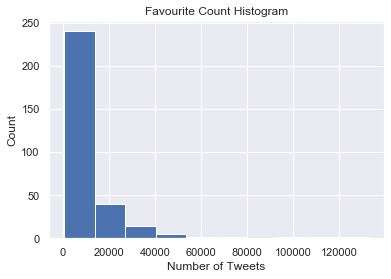

In [207]:
# Plotting histogram for the favourite count column variable

fig, ax1 = plt.subplots()
plt.hist(df_final_master_merged.favorite_count)
plt.title('Favourite Count Histogram');
ax1.set_ylabel('Count');
ax1.set_xlabel('Number of Tweets');


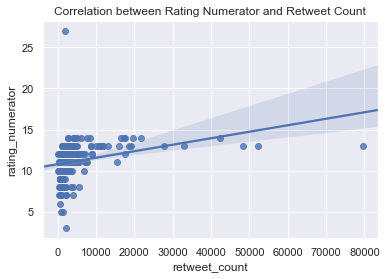

In [208]:
# Checking the correlation between the Rating Numerator and the Retweet Count 

sns.regplot(df_final_master_merged.retweet_count, df_final_master_merged.rating_numerator);
plt.title('Correlation between Rating Numerator and Retweet Count');